# Metaheuristics libraries in Python

* [PySWARM](https://pyswarms.readthedocs.io/en/latest/)
* [scikit-opt](https://scikit-opt.github.io/scikit-opt/#/en/README)
* [networkx](https://networkx.org/)
* [Distributed Evolutionary Algorithms in Python - DEAP](https://deap.readthedocs.io/en/master/)
* [OR-Tools](https://developers.google.com/optimization)
* [simanneal](https://github.com/perrygeo/simanneal)
* [Python Genetic Algorithms & Differential Evolution (PyGAD)](https://pygad.readthedocs.io/en/latest/)
* [MEALPY](https://mealpy.readthedocs.io/en/latest/)
* [SimAnneal](https://github.com/perrygeo/simanneal)
* [NSGA-II: Non-dominated Sorting Genetic Algorithm in Pymoo](https://pymoo.org/algorithms/moo/nsga2.html)
* [swarmlib](https://pypi.org/project/swarmlib/)
* [HIVE](https://rwuilbercq.github.io/Hive/)
* [ACO-Pants](https://pypi.org/project/ACO-Pants/)

# Function Optimization

## pyswarms example

In [1]:
#!pip install pyswarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Designer
import matplotlib.pyplot as plt
# Enables us to view it in a Jupyter notebook
from IPython.display import Image

# Set-up POS as an optimizer with 50 particles and predfined parameters
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)

#set-up the function to be optimized and the number of iteration
optimizer.optimize(fx.sphere, iters=100)

2023-01-22 15:51:53,141 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████|100/100, best_cost=5.8e-8
2023-01-22 15:51:53,364 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.795744434344934e-08, best pos: [-3.85983446e-05  2.37629148e-04]


(5.795744434344934e-08, array([-3.85983446e-05,  2.37629148e-04]))

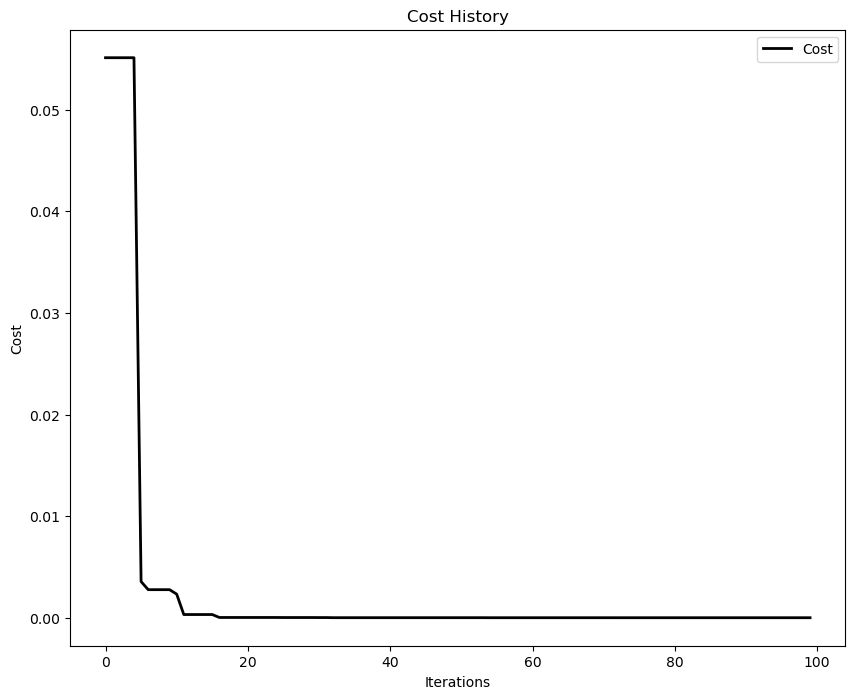

In [2]:
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

2023-01-22 15:51:58,821 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-01-22 15:51:58,823 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


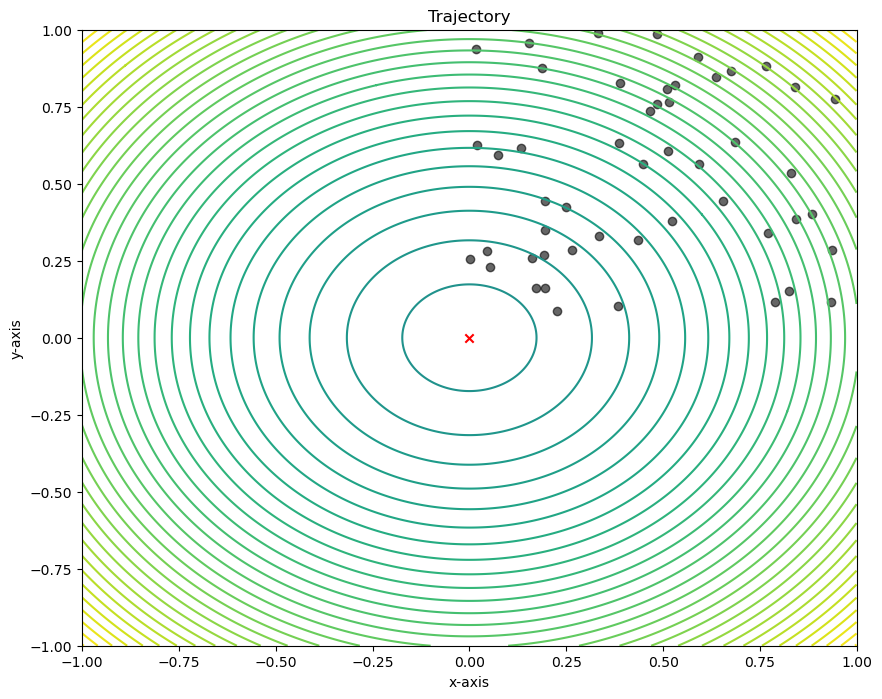

In [3]:
#conda install -c conda-forge ffmpeg

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere, limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

animation = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0))
animation.save('solution.gif', writer='imagemagick', fps=10)

In [4]:
# rendering the animation
Image(url='solution.gif')

## scikit-opt example

In [5]:
# !pip install scikit-opt

2023-01-22 15:52:34,714 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


best_x: [   4.7123875  -100.53096611] best_y -0.9999999999981987


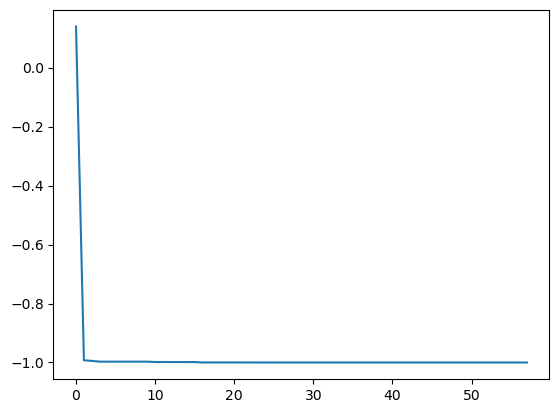

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.SA import SA

# define a multimodal function
obj_func = lambda x: np.sin(x[0]) * np.cos(x[1])

# solve using SA
sa = SA(func=obj_func, x0=np.array([-3, -3]), T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

# print the result
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

## pyswarm example

In [7]:
# !pip install --upgrade pyswarm

In [8]:
from pyswarms.single.global_best import GlobalBestPSO
import math

# Eggholder optimzation function
def eggholder_func(x):
    a=np.sqrt(np.fabs(x[:, 1]+x[:, 0]/2+47))
    b=np.sqrt(np.fabs(x[:, 0]-(x[:, 1]+47)))
    c=-(x[:, 1]+47)*np.sin(a)-x[:, 0]*np.sin(b)
    return c

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options)

In [9]:
cost, pos = optimizer.optimize(eggholder_func, 1000)
print(cost, pos)

2023-01-22 15:52:36,455 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████|1000/1000, best_cost=-66.8
2023-01-22 15:52:38,509 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -66.84371732946401, best pos: [ 8.45693434 15.65091806]


-66.84371732946401 [ 8.45693434 15.65091806]


# Travelling Salesman Problem (TSP)

In [10]:
# Define the TSP problem
city_names = ["1", "2", "3", "4", "5"]
distances = np.array([[0, 4, 2, 9, 12],
                      [4, 0, 7, 5, 5],
                      [2, 7, 0, 4, 10],
                      [9, 5, 4, 0, 3],
                      [12, 5, 10, 3, 0]])

## Solving TSP using scikit-opt

In [11]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

num_points = len(city_names)
points_coordinate = city_names
distance_matrix = distances

# The objective function. input routine, return total distance.
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# solving the problem using PSO
pso_tsp = PSO_TSP(func=cal_total_distance, n_dim=num_points, size_pop=200, max_iter=800, w=0.8, c1=0.1, c2=0.1)
best_points, best_distance = pso_tsp.run()
best_points_ = np.concatenate([best_points, [best_points[0]]])

print('best_distance', best_distance)
print('route', best_points_)

best_distance [18.]
route [3 4 1 0 2 3]


## Solving TSP using simulated annealing implemented in networkx

In [12]:
# !pip install networkx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import approximation as approx

# Create a graph
G=nx.Graph()

In [13]:
# add weighted edges to the graph and remove selfloop edges
for i in range(len(city_names)):
    for j in range(1,len(city_names)):
        G.add_weighted_edges_from({(city_names[i], city_names[j], distances[i][j])})
        G.remove_edges_from(nx.selfloop_edges(G))

In [14]:
# define pos is a dictionary of positions using using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G)

In [15]:
# solve TSP using simulated annealing
cycle = approx.simulated_annealing_tsp(G, "greedy", source=city_names[0])
edge_list = list(nx.utils.pairwise(cycle))
cost = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))

The route of the salesman is: ['1', '3', '4', '5', '2', '1'] with cost of  18


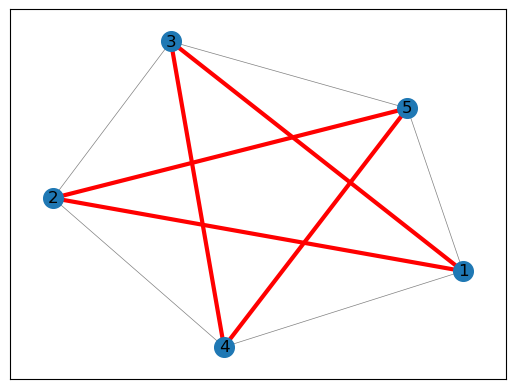

In [16]:
# Create an independent shallow copy of the graph and attributes
H = G.copy()

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="gray", width=0.5)

# Draw the route
nx.draw_networkx(
    H,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the salesman is:", cycle, "with cost of ", cost)
plt.show()

## Solving TSP using deap

In [17]:
# !pip install deap

In [18]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

# Create a fitness function that minimizes the total distance
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create the genetic operator functions
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(len(city_names)), len(city_names))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_tsp(individual):
    total_distance = 0
    for i in range(len(individual)):
        city_1 = individual[i]
        city_2 = individual[(i + 1) % len(individual)]
        total_distance += distances[city_1][city_2]
    return total_distance,

toolbox.register("evaluate", eval_tsp)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                               stats=stats, halloffame=hof, verbose=True)

# Print the final solution
best_individual = hof[0]
print("Best solution:")
print("  - Fitness: ", eval_tsp(best_individual))
print("  - Route: ", [city_names[i] for i in best_individual])

gen	nevals	avg  	min	max
0  	50    	31.92	18 	43 
1  	25    	28.6 	18 	43 
2  	37    	26.04	18 	37 
3  	30    	23.7 	18 	33 
4  	29    	22.08	18 	37 
5  	27    	21.04	18 	32 
6  	32    	19.08	18 	32 
7  	32    	20.28	18 	37 
8  	30    	19.56	18 	30 
9  	32    	21.12	18 	32 
10 	31    	19.02	18 	29 
11 	36    	19.2 	18 	30 
12 	34    	20   	18 	32 
13 	24    	18.8 	18 	28 
14 	39    	18.48	18 	32 
15 	31    	18.2 	18 	28 
16 	29    	19.52	18 	32 
17 	29    	19.08	18 	30 
18 	27    	18.4 	18 	28 
19 	25    	18.8 	18 	32 
20 	28    	19.4 	18 	32 
21 	27    	18.72	18 	28 
22 	33    	19.16	18 	32 
23 	35    	18.76	18 	28 
24 	29    	18.24	18 	24 
25 	27    	18.22	18 	29 
26 	21    	18.7 	18 	33 
27 	31    	18.32	18 	28 
28 	32    	18.76	18 	32 
29 	30    	18.36	18 	30 
30 	31    	18.44	18 	30 
31 	31    	18.52	18 	28 
32 	29    	18.28	18 	32 
33 	30    	18.56	18 	32 
34 	34    	18.52	18 	32 
35 	30    	18.12	18 	24 
36 	36    	18.32	18 	28 
37 	30    	18.2 	18 	28 
38 	33    	18   	18 	18 


## Solving TSP using OR-Tools

In [19]:
#!pip install --upgrade --user ortools

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [21]:
# define problem data
data = {}
data['distance_matrix'] = distances
data['num_vehicles'] = 1
data['depot'] = 0

# define the solver
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)   

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.TABU_SEARCH) # GREEDY_DESCENT, SIMULATED_ANNEALING, GENERIC_TABU_SEARCH
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

# print the solution
def print_solution(manager, routing, solution):
    print('Objective: {} meters'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}meters\n'.format(route_distance)

solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)

Objective: 18 meters
Route for vehicle 0:
 0 -> 2 -> 3 -> 4 -> 1 -> 0



## Solving TSP using simanneal

In [22]:
# !pip install simanneal 
from __future__ import print_function
import math
import random
from collections import defaultdict
from simanneal import Annealer
from haversine import haversine


class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [23]:
# latitude and longitude for the twenty largest U.S. cities
cities = {
    'New York City': (40.72, -74.00),
    'Los Angeles': (34.05, -118.25),
    'Chicago': (41.88, -87.63),
    'Houston': (29.77, -95.38),
    'Phoenix': (33.45, -112.07),
    'Philadelphia': (39.95, -75.17),
    'San Antonio': (29.53, -98.47),
    'Dallas': (32.78, -96.80),
    'San Diego': (32.78, -117.15),
    'San Jose': (37.30, -121.87),
    'Detroit': (42.33, -83.05),
    'San Francisco': (37.78, -122.42),
    'Jacksonville': (30.32, -81.70),
    'Indianapolis': (39.78, -86.15),
    'Austin': (30.27, -97.77),
    'Columbus': (39.98, -82.98),
    'Fort Worth': (32.75, -97.33),
    'Charlotte': (35.23, -80.85),
    'Memphis': (35.12, -89.97),
    'Baltimore': (39.28, -76.62)
}

# initial state, a randomly-ordered itinerary
init_state = list(cities)
random.shuffle(init_state)

# create a distance matrix based on latitude-longitude coordinates
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
    for kb, vb in cities.items():
        distance_matrix[ka][kb] = 0.0 if kb == ka else haversine((va[0], va[1]), (vb[0], vb[1])) 

tsp = TravellingSalesmanProblem(init_state, distance_matrix)
tsp.set_schedule(tsp.auto(minutes=0.2))
# since our state is just a list, slice is the fastest way to copy
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

while state[0] != 'New York City':
    state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i mile route:" % e)
print(" ➞  ".join(state))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     3.30000      11065.27     5.40%     0.00%     0:00:06    -1:59:58 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     3.30000      11005.17     5.87%     0.00%     0:00:05     0:00:00


11005 mile route:
New York City ➞  Columbus ➞  Detroit ➞  Chicago ➞  Indianapolis ➞  Memphis ➞  Dallas ➞  Fort Worth ➞  San Francisco ➞  San Jose ➞  Los Angeles ➞  San Diego ➞  Phoenix ➞  San Antonio ➞  Austin ➞  Houston ➞  Jacksonville ➞  Charlotte ➞  Baltimore ➞  Philadelphia


In [24]:
# Visualize the cities and then route

# Create a graph
G=nx.Graph()

for ka, va in cities.items():
    for kb, vb in cities.items():
        G.add_weighted_edges_from({(ka,kb, distance_matrix[ka][kb])})
        G.remove_edges_from(nx.selfloop_edges(G))

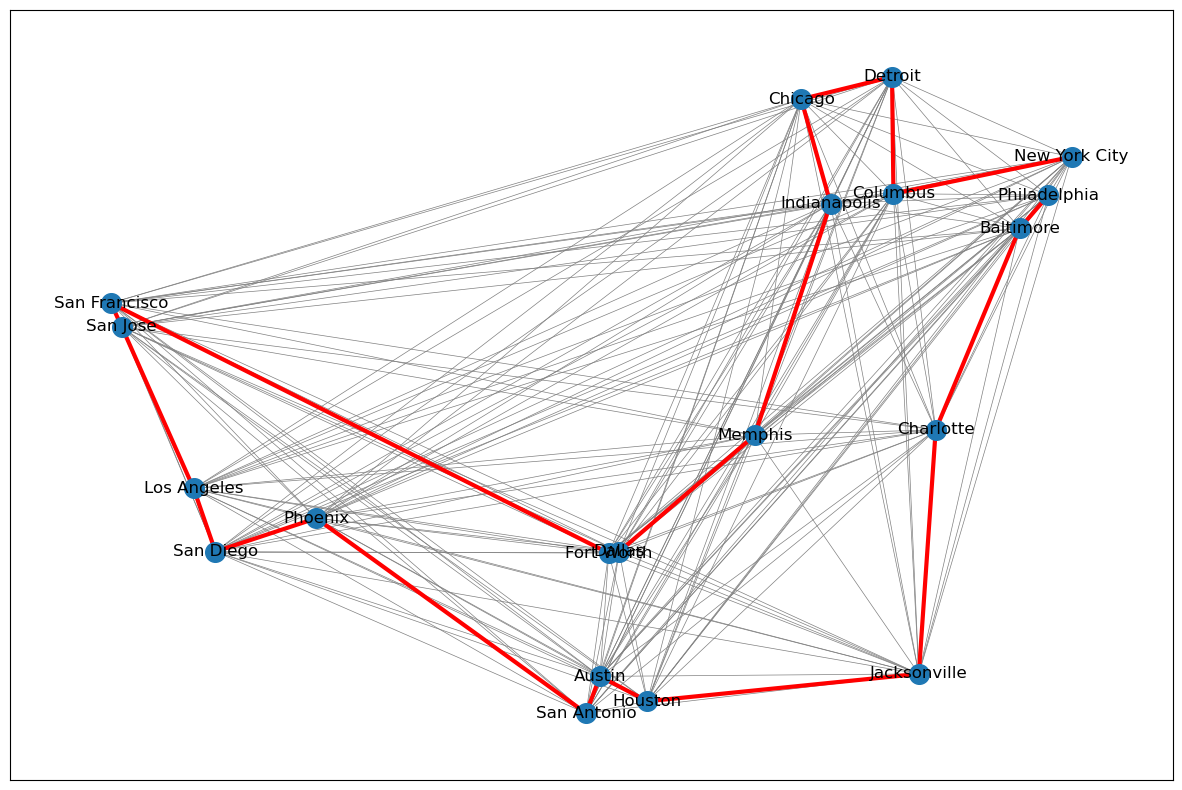

In [25]:
fig, ax = plt.subplots(figsize=(15,10))

# reverse lat and long for correct visualization
reversed_dict = {key: value[::-1] for key, value in cities.items()}

# Create an independent shallow copy of the graph and attributes
H = G.copy()

edge_list = list(nx.utils.pairwise(state))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos=reversed_dict, edge_color="gray", width=0.5)

# Draw the route
ax=nx.draw_networkx(
    H,
    pos=reversed_dict,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

plt.show()